In [1]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Lay image va label
for i in range(classes):
    #đường dẫn thư mục chứa hình ảnh
    path = os.path.join(cur_path,'train',str(i))
    # lấy danh sách tên file trong thư mục
    images = os.listdir(path)

    for a in images:
        try:
            #open image
            image = Image.open(path + '\\'+ a)
            #thay đổi kích thước thành 30x30
            image = image.resize((30,30))
            #chuyển đổi hình ảnh thành mảng numpy
            image = np.array(image)
    
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
#Chuyen doi list sang numpy arrays
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=43)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [6]:
print("Shape of train images is: ", X_train.shape)
print("Shape of label is: ", y_train.shape)

Shape of train images is:  (31367, 30, 30, 3)
Shape of label is:  (31367, 43)


# Show Datasets in CSV Formet

In [7]:
train_data=pd.read_csv('Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [8]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


# Let's Visualize the testing Data

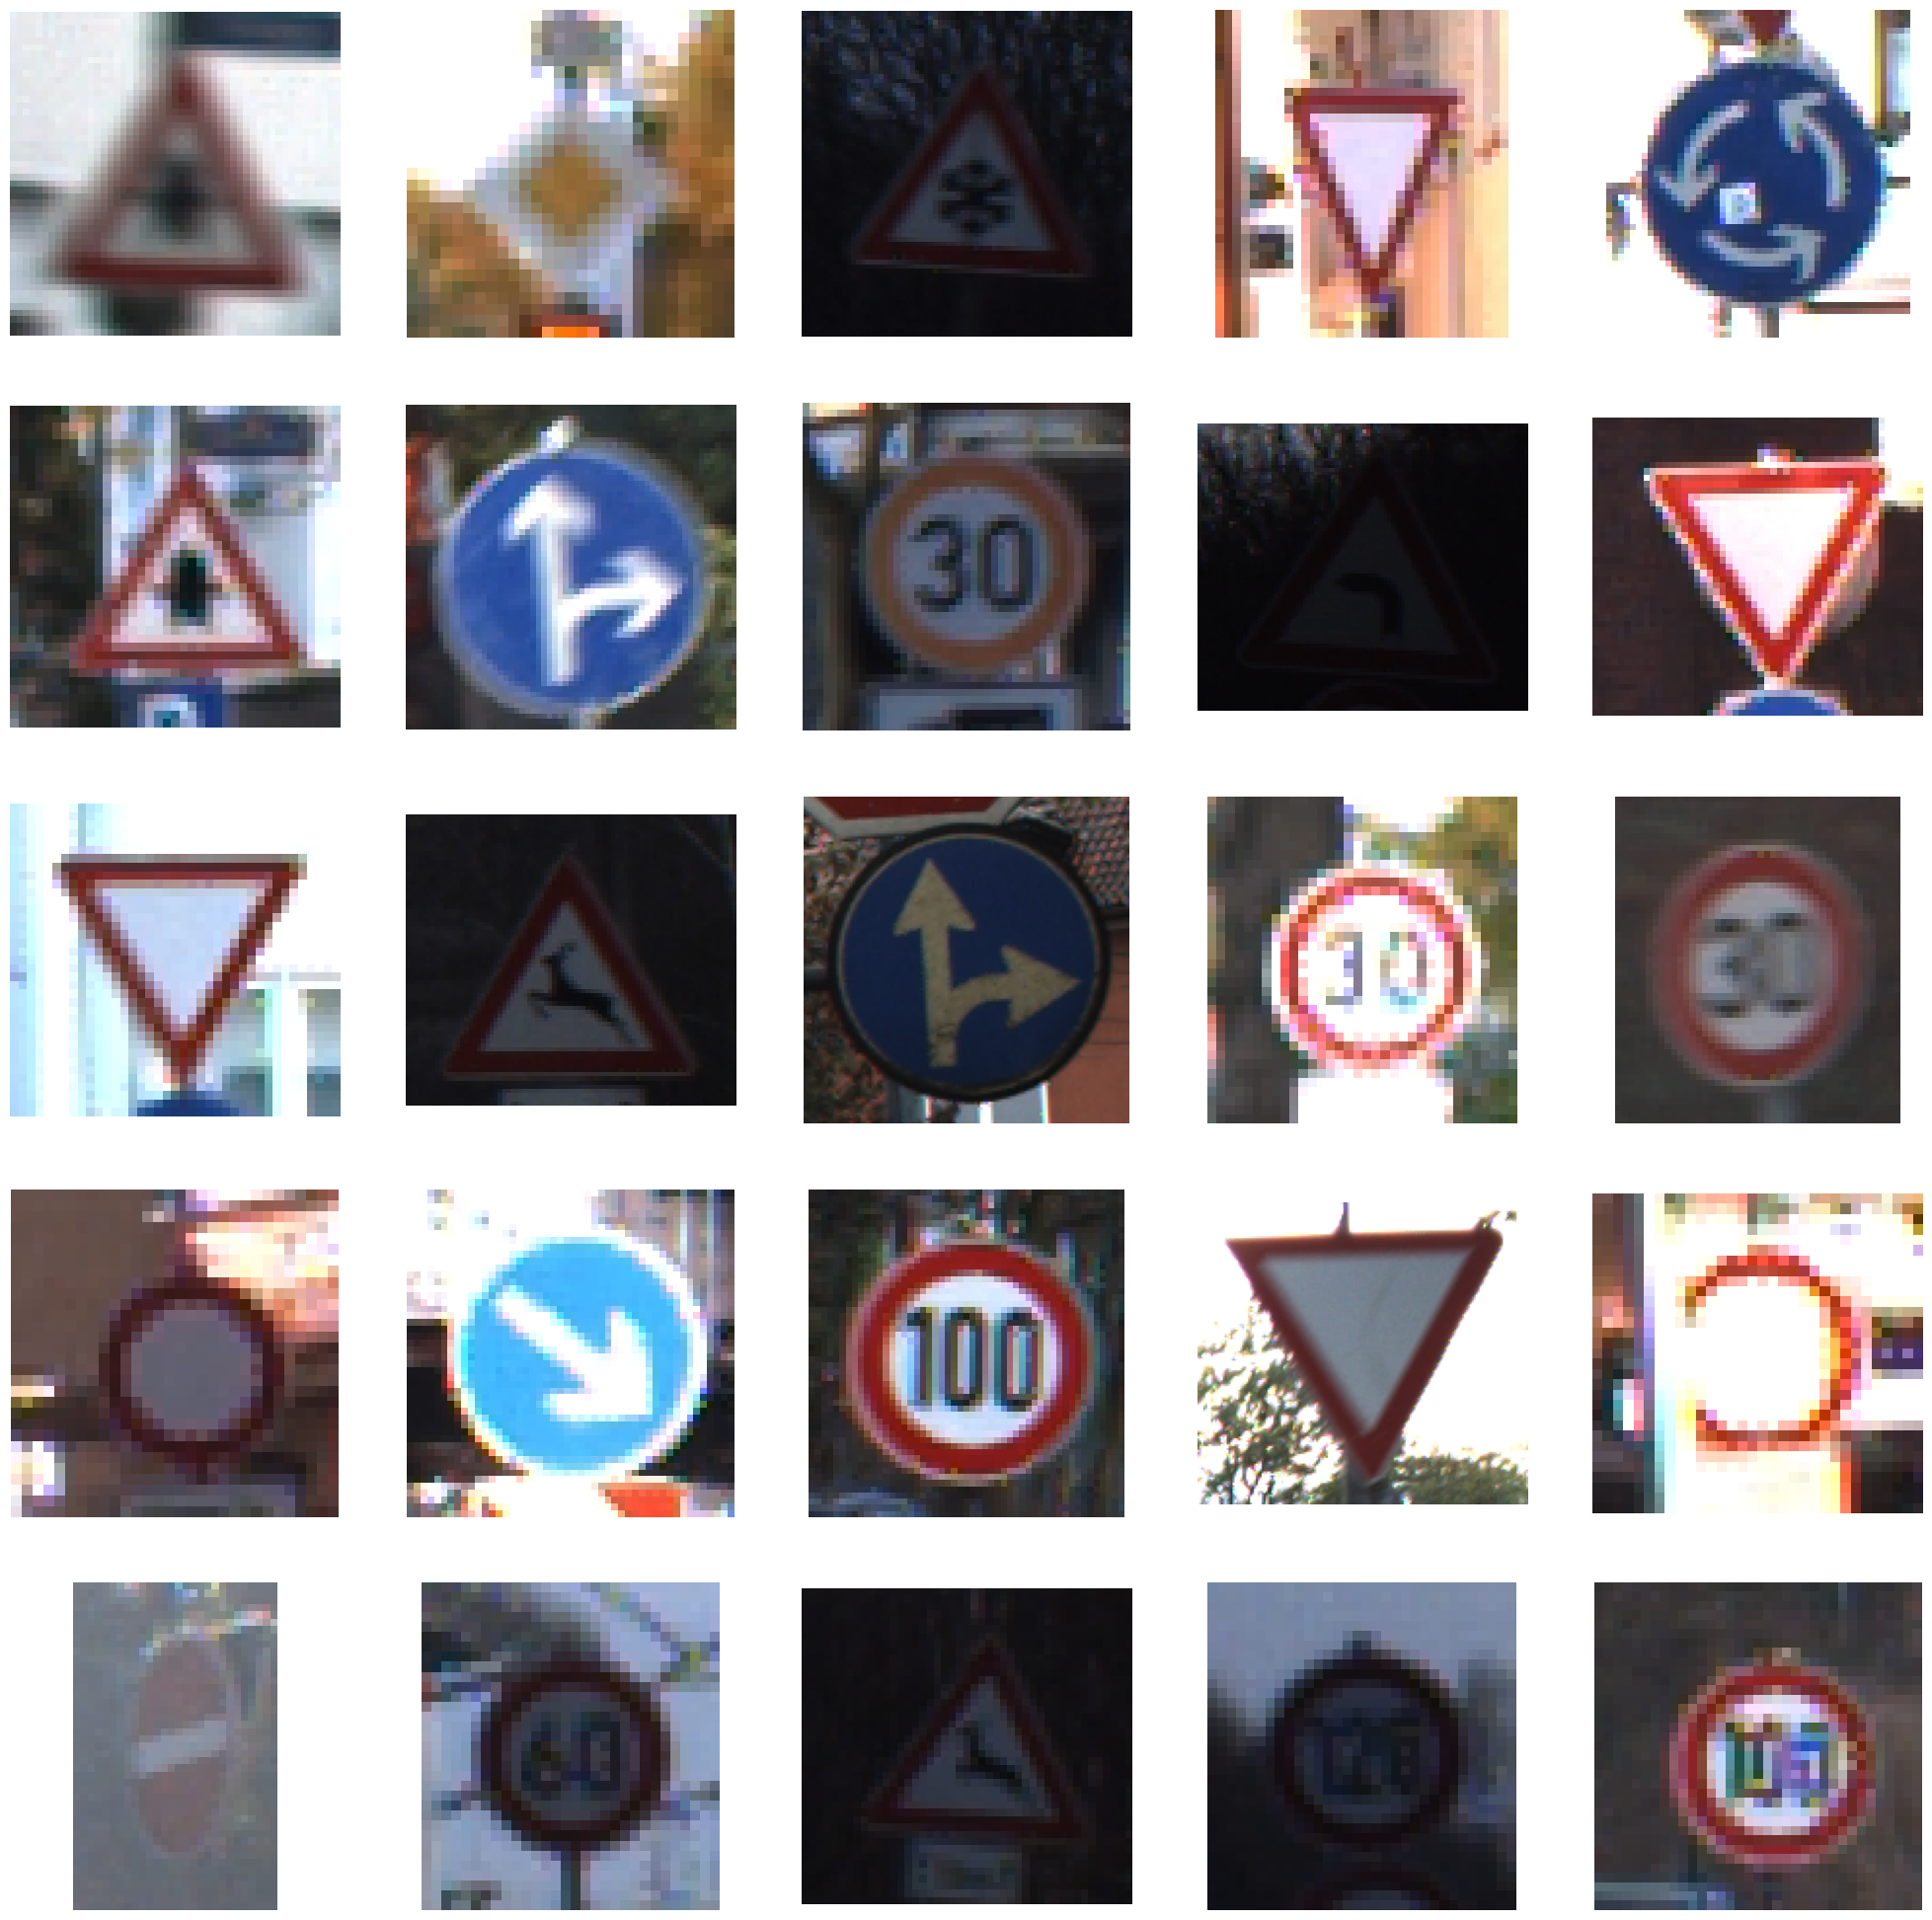

In [18]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(False)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)
    
    


# Build a CNN model

In [10]:
#Build a CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

# Train and validate the model

In [8]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model1.h5")

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.3240 - loss: 3.1261 - val_accuracy: 0.9139 - val_loss: 0.3604
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 59s 60ms/step - accuracy: 0.8216 - loss: 0.6439 - val_accuracy: 0.9551 - val_loss: 0.1602
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.8865 - loss: 0.3920 - val_accuracy: 0.9651 - val_loss: 0.1229
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.9101 - loss: 0.3159 - val_accuracy: 0.9819 - val_loss: 0.0671
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.9299 - loss: 0.2517 - val_accuracy: 0.9654 - val_loss: 0.1181
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9335 - loss: 0.2486 - val_accuracy: 0.9648 - val_loss: 0.1246
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9293 - loss: 0.2512 - val_accuracy: 0.9485 - val_loss: 0.1796
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.9310 - loss: 0.2581 - 

# plotting graphs for accuracy

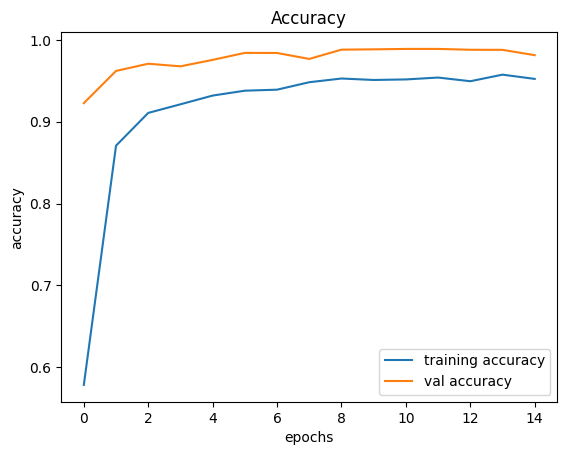

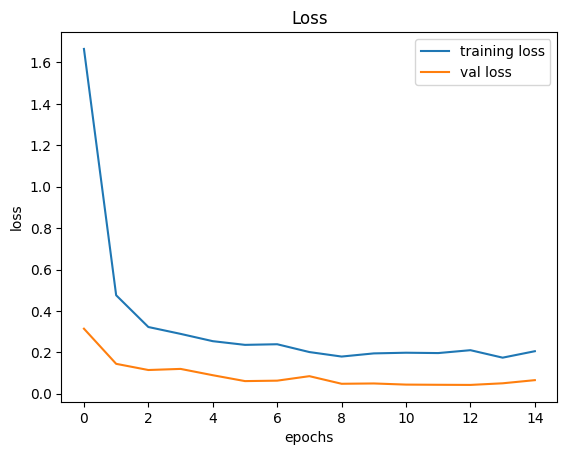

In [9]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()